# dsmpy: usage 

In [1]:
!conda install -c conda-forge -c afeborgeaud dsmpy -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/navy/anaconda3/envs/dsmtmp

  added / updated specs:
    - dsmpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lxml-4.6.3                 |   py37h250624f_0         1.2 MB  conda-forge
    mpich-3.4.1                |     hd33e60e_104         7.0 MB  conda-forge
    sqlalchemy-1.4.3           |   py37h271585c_0         2.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        10.4 MB

The following NEW packages will be INSTALLED:

  brotlipy           conda-forge/osx-64::brotlipy-0.7.0-py37hf967b71_1001
  chardet            conda-forge/osx-64::chardet-4.0.0-p

In [5]:
from dsmpy import dsm, seismicmodel
from dsmpy.event import Event
from dsmpy.station import Station
from dsmpy.utils.cmtcatalog import read_catalog

In [6]:
# download the Global Centroid Moment Tensor catalog (https://www.globalcmt.org/)
catalog = read_catalog()

Dowloading gcmt catalog.
Takes a few minutes. Done only once.


In [7]:
# get and event from the GCMT catalog
event = Event.event_from_catalog(
    catalog, '200707211534A')

In [8]:
# define an array of seismic stations
stations = [
    Station(
        name='FCC', network='CN',
        latitude=58.7592, longitude=-94.0884), 
    ]

In [10]:
# use the seismic model PREM (http://ds.iris.edu/spud/earthmodel/9991844)
seismic_model = seismicmodel.SeismicModel.prem()

In [ ]:
# set the record length, number of points in freqency domain, and time sampling
tlen = 3276.8
nspc = 256
sampling_hz = 20

In [11]:
input = dsm.PyDSMInput.input_from_arrays(
    event, stations, seismic_model, tlen, nspc, sampling_hz)

In [22]:
# compute the seismic waveforms (done in the frequency domain)
output = dsm.compute(input)

compute PSV
compute SH


In [23]:
# transform to the time domain using inverse FFT and apply a low-pass filter
output.to_time_domain()
output.filter(freq=0.04)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

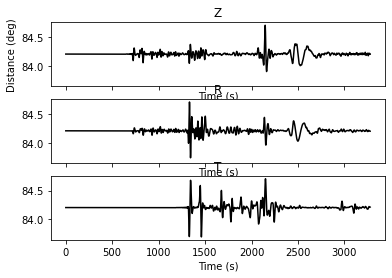

In [25]:
output.plot()
plt.show()